## Import libraries

In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sig_seasontrans import SMSig
import json
# Specify current directory create output directory if it does not exist
os.getcwd()


'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\libs\\SMSig'

In [126]:
def to_datetime(df, time_column, format="%Y-%m-%d %H:%M:%S"):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column], format=format)
    return df.set_index(time_column)

# Test if signatures/parameters fits well for observed data

## Coweeta

In [127]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Coweeta"
test_file = "test_daily_2014_2018_sm_basinavg.csv"

In [128]:
_data = pd.read_csv(os.path.join(home_dir,"data", site, test_file))
_data = to_datetime(_data, "Time")
data = _data["Soil Moisture Content"]

data.head()

Time
2015-08-04    0.153545
2015-08-05    0.151452
2015-08-06    0.164292
2015-08-07    0.164678
2015-08-08    0.159843
Name: Soil Moisture Content, dtype: float64

In [129]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=True
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2016:dry2wet
dry2wet Shift=0.24 slope=0.00122 start timing: 6.240362 end timing: 69.669839
Processing 2017:dry2wet
dry2wet Shift=0.04 slope=0.00630 start timing: 13.758596 end timing: 29.302573
Processing 2015:dry2wet
dry2wet Shift=0.03 slope=0.00322 start timing: 66.972574 end timing: 16.122083
Processing 2016:wet2dry
wet2dry Shift=0.42 slope=-0.00176 start timing: 52.860470 end timing: 50.336014
Processing 2017:wet2dry
wet2dry Shift=0.38 slope=-0.00083 start timing: 79.566420 end timing: 77.372427
Processing 2015:wet2dry
Check seasonal_cycle.csv
[[2457275.74036169 2457345.41020087 2457494.36047029 2457544.69648472]
 [2457707.25859617 2457736.5611689  2457884.06642032 2457961.43884706]
 [2458037.47257424 2458053.59465734              nan              nan]]


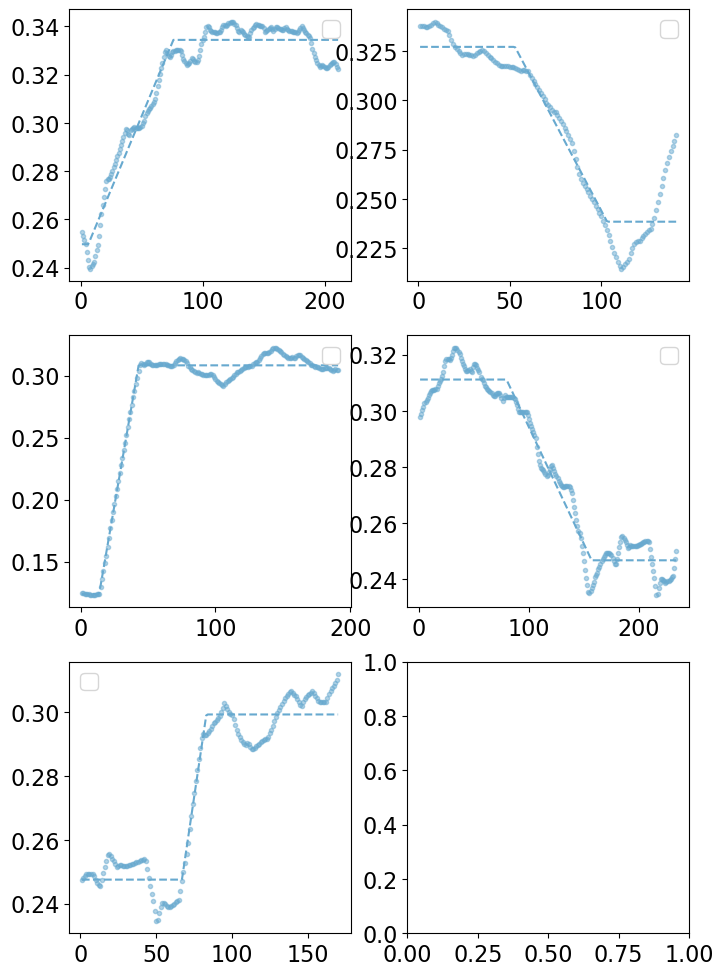

In [130]:
# Load the configuration
seasonal_cycle = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycle.csv"), parse_dates=['start_date', 'end_date'])

_parameter_config = os.path.join(home_dir,"data", site, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)

season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)
print(season_trans_obs)

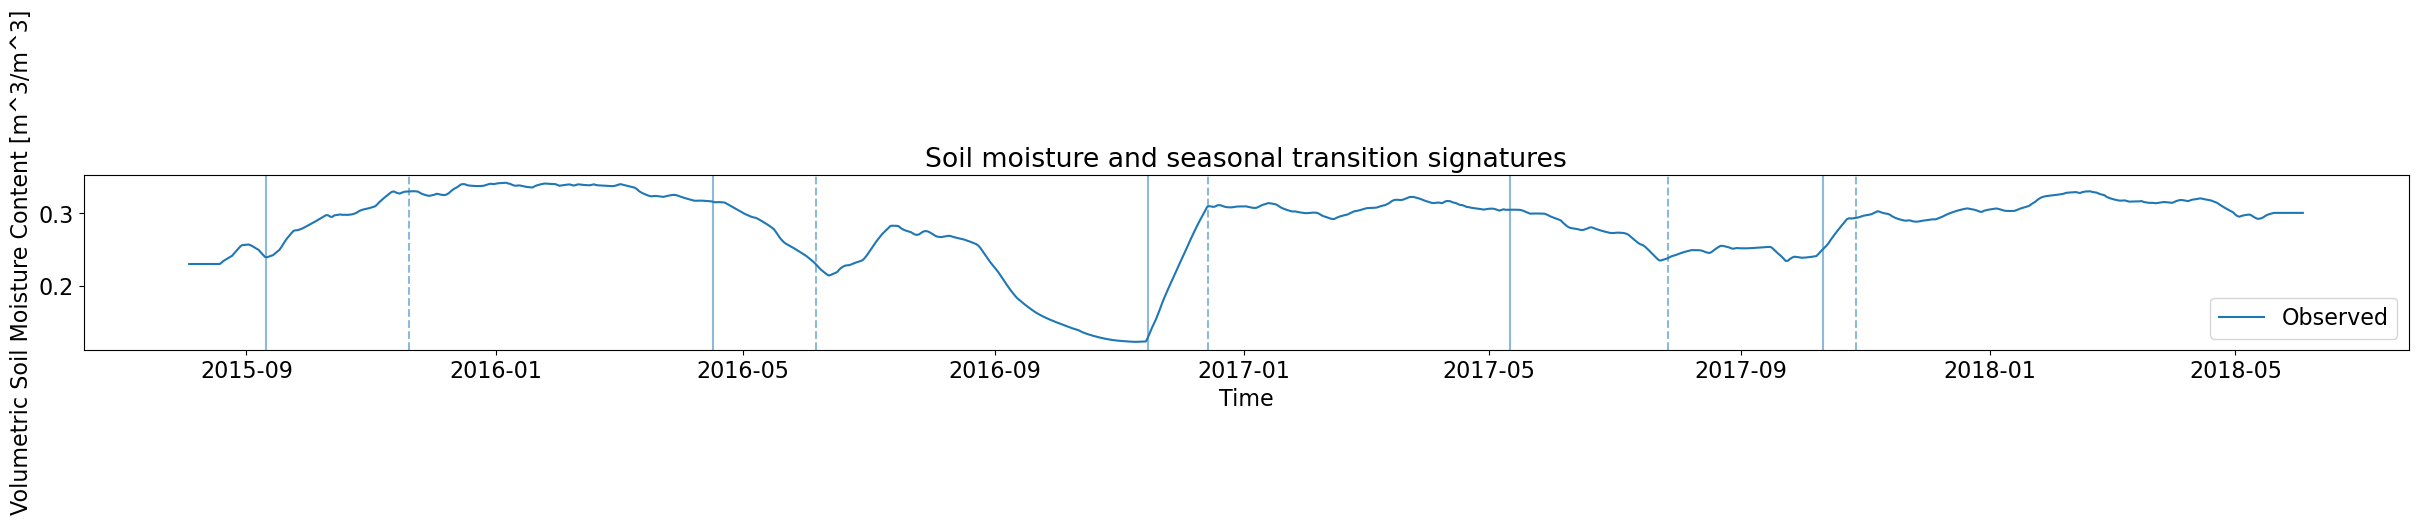

In [131]:
# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()


## Mahurangi

In [132]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Mahurangi"
test_file = "test_daily_1998_2001_sm_basinavg.csv"

In [133]:
_data = pd.read_csv(os.path.join(home_dir, "data", site, test_file))
_data = to_datetime(_data, "Time", format= r"%Y-%m-%d")
data = _data["Soil Moisture Content"]

data.head()

Time
1998-02-20    0.352933
1998-02-21    0.356116
1998-02-22    0.370902
1998-02-23    0.370510
1998-02-24    0.382052
Name: Soil Moisture Content, dtype: float64

In [134]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    t=data.index.to_numpy(),
    sm=data.to_numpy(),
    plot_results=True,
    verbose=False
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([[2451242.32567492, 2451364.20459265, 2451090.56795193,
        2451197.12963485],
       [2451642.40619964, 2451704.30237676, 2451504.93581109,
        2451578.32322967],
       [2452010.9044171 , 2452050.93973912, 2451795.6336235 ,
        2451904.17799304]])

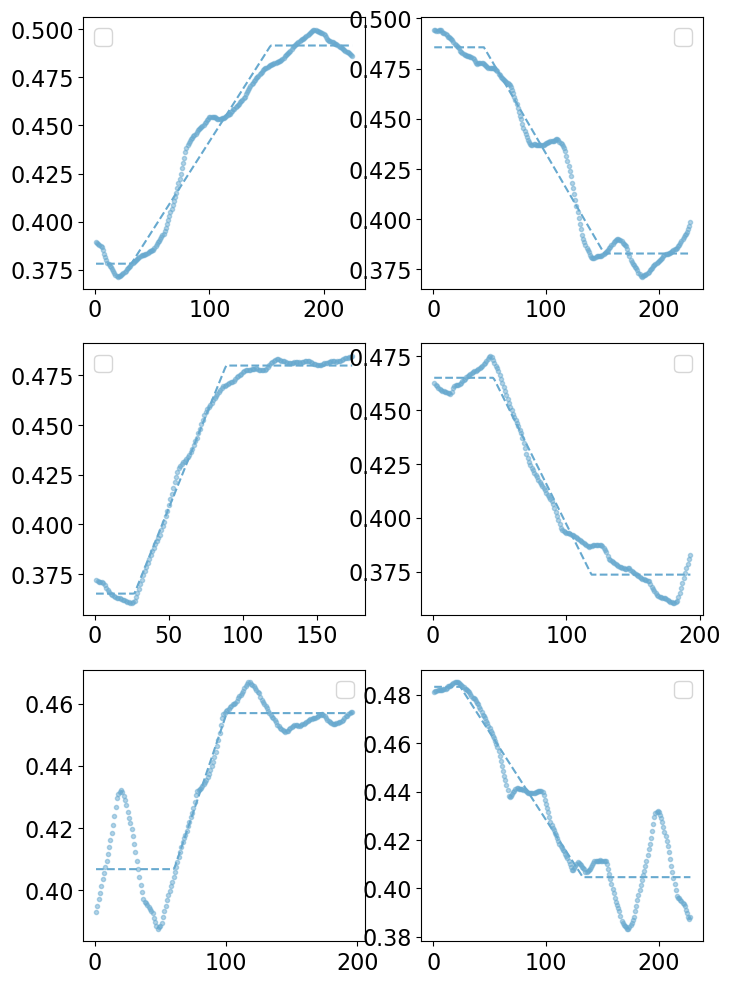

In [135]:
seasonal_cycle = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycle.csv"), parse_dates=['start_date', 'end_date'])

_parameter_config = os.path.join(home_dir,"data", site, "seasonal_transition_config.json")
with open(_parameter_config, "r") as config_file:
    config = json.load(config_file)

season_trans_obs = sig_obs.calc_seasontrans(seasonal_cycle=seasonal_cycle, parameter_config=config)
season_trans_obs

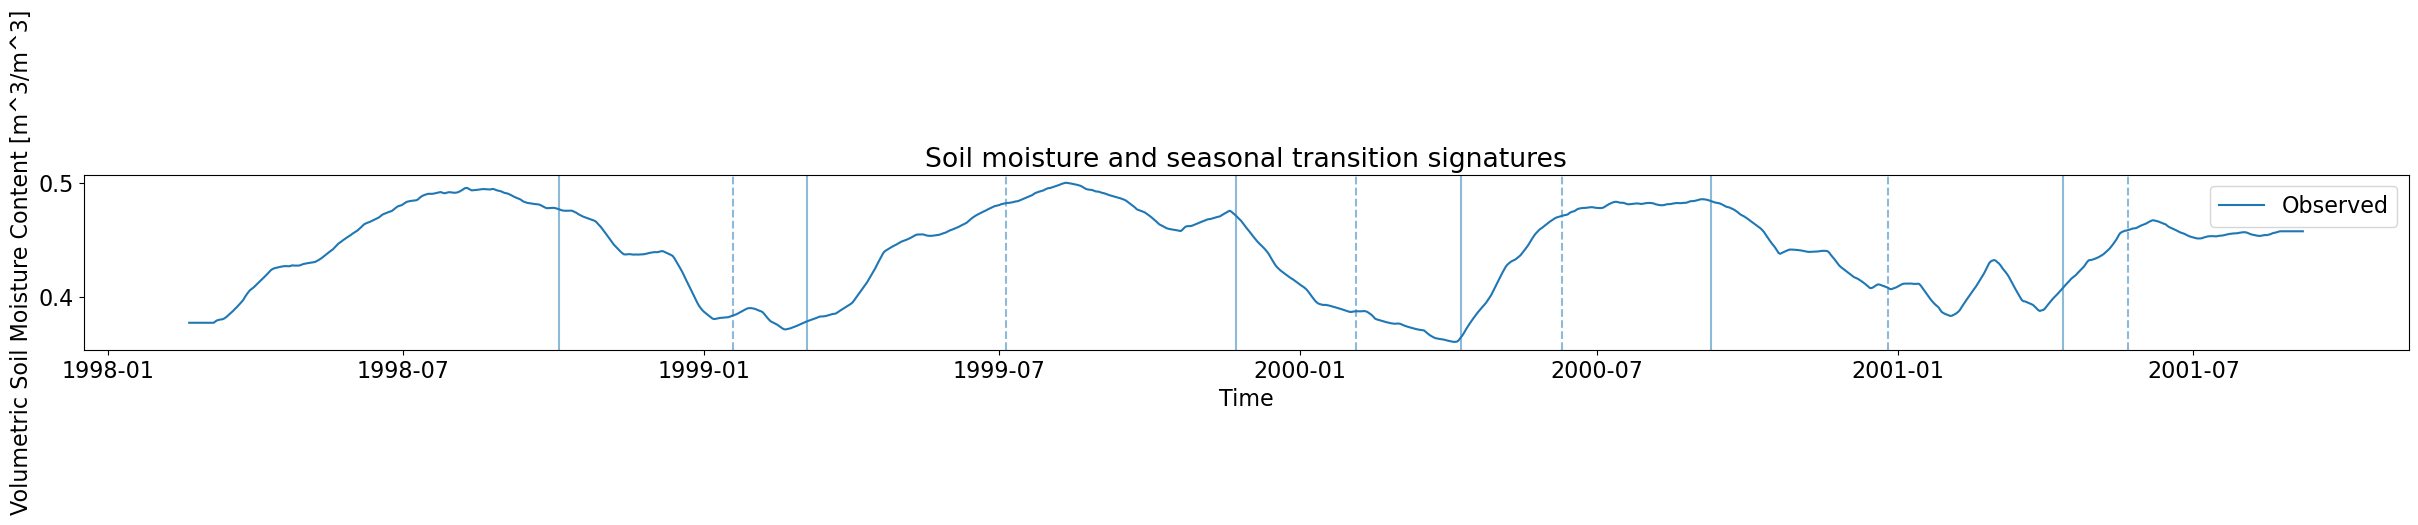

In [136]:
# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
import numpy as np
from datetime import datetime, timedelta
def julian_to_datetime(jd):
    try:
        return datetime(1, 1, 1) + timedelta(days=jd - 1721425)
    except Exception as e:
        # Return np.nan if there's an error
        return np.nan

stard_dates_jd = np.concatenate([season_trans_obs[:, 0], season_trans_obs[:, 2]])
start_dates_obs = [julian_to_datetime(jd) for jd in stard_dates_jd]
end_dates_jd = np.concatenate([season_trans_obs[:, 1], season_trans_obs[:, 3]])
end_dates_obs = [julian_to_datetime(jd) for jd in end_dates_jd]

for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()
